In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Importing all the Necessary Libraries**

In [3]:
# Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [4]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

## **Preprocessing the dataset**

In [5]:
# Reading and displaying the first five rows of the dataset
df=pd.read_csv('/content/drive/MyDrive/Maharashtra Data - Sheet1.csv')
df.head()

,Serial Number,Society Name,Type of institution,Registration Number,Registration Date,"Address, Road","Street, Near",Opposite,District,Ward,Localities,Audit Grade,Paid Up Share Capital,Validation Status
0,1,Bitul Aman Chs.Ltd,महाराष्ट्र राज्य सहकारी बँक,BOM/WB/HSG/TC/6943,06/10/2006,5-7,Emamwada,NaN,Mumbai 1,वार्ड-बी,मस्जिद,B,1550.0,Rejected
1,2,SUKHADA SAHAKARI GRUHANIRAMAN SANSTHA LTD,महाराष्ट्र राज्य सहकारी बँक,B.O.M./W.G.S./H.S.G/T.C/6666,25/01/1996,SUKHADA,SIR POCHKHANWALA ROAD,OPP. WORLI R.T.O.,Mumbai 1,वार्ड-जी दक्षिंण,वरळी,B,21500.0,Accepted
2,3,Fairlwan CHS Ltd,महाराष्ट्र राज्य सहकारी बँक,BOM/HSG/5188 of 1977,19/08/1977,120 M. Karve Road,Churchgate,NaN,Mumbai 1,वार्ड-ए,चर्चगेट,A,3000.0,Rejected
3,4,THE NAVAL DOCKYARD CO-OPERATIVE BANK LIMITED,महाराष्ट्र राज्य सहकारी बँक,6969,24/02/1931,NAVAL DOCKYARD,SHAHID BHAGAT SINGH MARG,LION GATE,Mumbai 1,वार्ड-ए,चर्चगेट,1,1069.0,Accepted
4,5,NIRMAN KENDRA PREMISES CO-OPERATIVE SOCIETY LI...,महाराष्ट्र राज्य सहकारी बँक,BOM/W/G-S/GNL/(C)/463/97-98/97,07/11/1997,PLOT NO.3,"Dr. E. MOSES ROAD, C.S. NO. 4/69(Part)","Near Famous Studios, Mahalaxmi Estate",Mumbai 1,वार्ड-जी दक्षिंण,लोअर परेल,2,45800.0,Accepted


In [6]:
# Displaying the number of rows and columns present in the dataset
df.shape

(2995, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          2995 non-null   int64  
 1   Society Name           2995 non-null   object 
 2   Type of institution    2995 non-null   object 
 3   Registration Number    2995 non-null   object 
 4   Registration Date      2995 non-null   object 
 5   Address, Road          2995 non-null   object 
 6   Street, Near           2642 non-null   object 
 7   Opposite               2102 non-null   object 
 8   District               2995 non-null   object 
 9   Ward                   2989 non-null   object 
 10  Localities             2620 non-null   object 
 11  Audit Grade            2987 non-null   object 
 12  Paid Up Share Capital  2992 non-null   float64
 13  Validation Status      2740 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 327.7+

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial Number,2995.0,1.498000e+03,8.647264e+02,1.0,749.5,1498.0,2246.5,2.995000e+03
Paid Up Share Capital,2992.0,1.492747e+07,2.048277e+08,0.0,19000.0,118375.0,1328450.0,6.123962e+09


In [9]:
# Displaying the number of unique values present in each column
df.nunique()

Serial Number            2995
Society Name             2925
Type of institution        46
Registration Number      2900
Registration Date        2172
Address, Road            2811
Street, Near             1980
Opposite                 1396
District                    1
Ward                        9
Localities                 16
Audit Grade                 8
Paid Up Share Capital    1759
Validation Status           5
dtype: int64

In [10]:
# Checking if there are any null values
df.isnull().sum()

Serial Number              0
Society Name               0
Type of institution        0
Registration Number        0
Registration Date          0
Address, Road              0
Street, Near             353
Opposite                 893
District                   0
Ward                       6
Localities               375
Audit Grade                8
Paid Up Share Capital      3
Validation Status        255
dtype: int64

In [11]:
df['Ward'].unique()

array(['वार्ड-बी', 'वार्ड-जी दक्षिंण', 'वार्ड-ए', 'वार्ड-जी उत्तर',
       'वार्ड-इ', 'वार्ड-एफ उत्तर', 'वार्ड-डी', 'वार्ड-एफ दक्षिंण',
       'वार्ड-सी', nan], dtype=object)

In [12]:
# Since there are null values present in the dataset we drop all the rows containing the null values
df=df.dropna()

In [13]:
# After dropping the null values displaying the number of rows and columns present in the dataset
df.shape

(1764, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 1 to 2994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          1764 non-null   int64  
 1   Society Name           1764 non-null   object 
 2   Type of institution    1764 non-null   object 
 3   Registration Number    1764 non-null   object 
 4   Registration Date      1764 non-null   object 
 5   Address, Road          1764 non-null   object 
 6   Street, Near           1764 non-null   object 
 7   Opposite               1764 non-null   object 
 8   District               1764 non-null   object 
 9   Ward                   1764 non-null   object 
 10  Localities             1764 non-null   object 
 11  Audit Grade            1764 non-null   object 
 12  Paid Up Share Capital  1764 non-null   float64
 13  Validation Status      1764 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 206.7+

In [15]:
df.nunique()

Serial Number            1764
Society Name             1733
Type of institution        40
Registration Number      1735
Registration Date        1455
Address, Road            1707
Street, Near             1379
Opposite                 1193
District                    1
Ward                        9
Localities                 16
Audit Grade                 8
Paid Up Share Capital    1231
Validation Status           5
dtype: int64

In [16]:
df.isnull().sum()

Serial Number            0
Society Name             0
Type of institution      0
Registration Number      0
Registration Date        0
Address, Road            0
Street, Near             0
Opposite                 0
District                 0
Ward                     0
Localities               0
Audit Grade              0
Paid Up Share Capital    0
Validation Status        0
dtype: int64

## **Visualization**

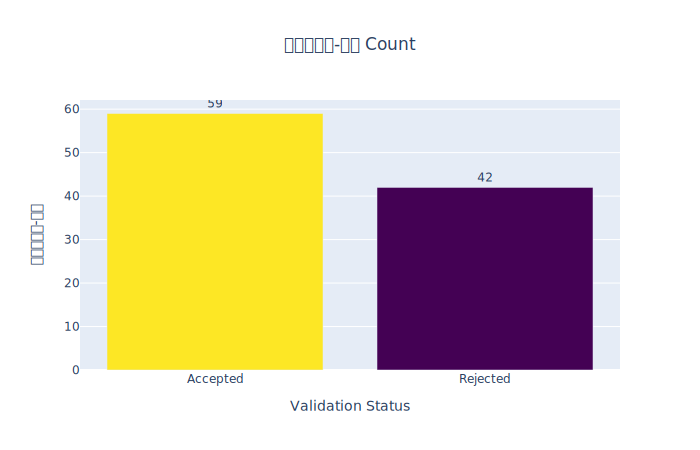

In [17]:
df_ward=df[df["Ward"]=="वार्ड-बी"]
df_ward_model=df_ward["Validation Status"].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
fig = go.Figure(go.Bar(
    x=df_ward_model['Validation Status'],y=df_ward_model['Count'],
    marker={'color': df_ward_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ward_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='वार्ड-बी Count',xaxis_title="Validation Status ",yaxis_title="वार्ड-बी ",title_x=0.5)
fig.show("svg")

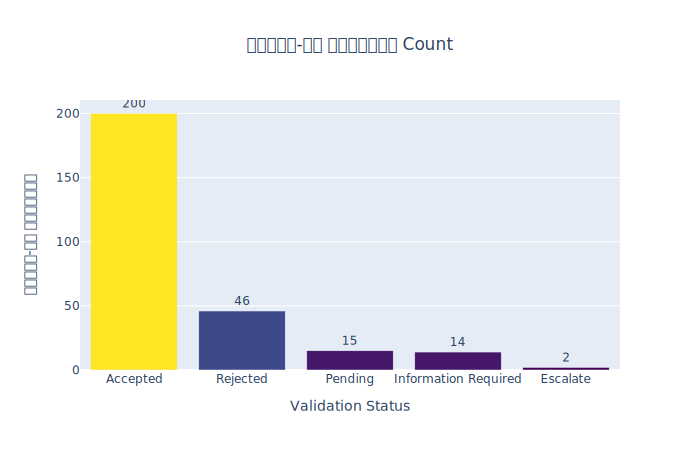

In [18]:
df_ward=df[df["Ward"]=="वार्ड-जी दक्षिंण"]
df_ward_model=df_ward["Validation Status"].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
fig = go.Figure(go.Bar(
    x=df_ward_model['Validation Status'],y=df_ward_model['Count'],
    marker={'color': df_ward_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ward_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='वार्ड-जी दक्षिंण Count',xaxis_title="Validation Status ",yaxis_title="वार्ड-जी दक्षिंण ",title_x=0.5)
fig.show("svg")

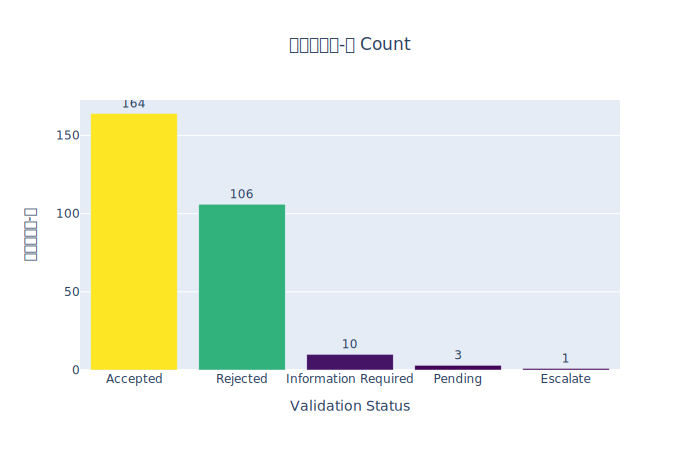

In [19]:
df_ward=df[df["Ward"]=="वार्ड-ए"]
df_ward_model=df_ward["Validation Status"].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
fig = go.Figure(go.Bar(
    x=df_ward_model['Validation Status'],y=df_ward_model['Count'],
    marker={'color': df_ward_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ward_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='वार्ड-ए Count',xaxis_title="Validation Status ",yaxis_title="वार्ड-ए ",title_x=0.5)
fig.show("svg")

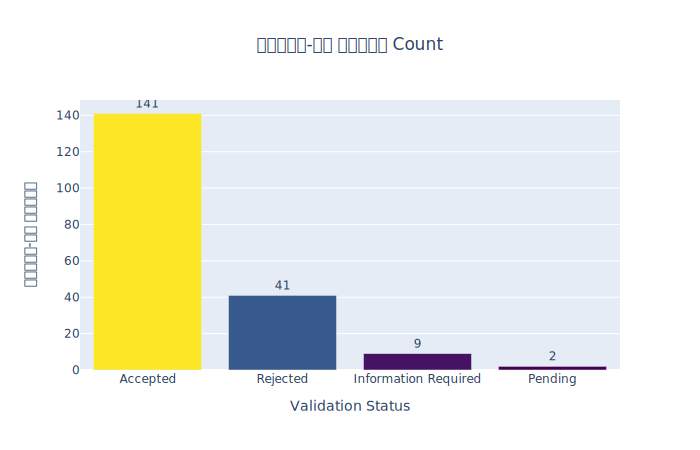

In [20]:
df_ward=df[df["Ward"]=="वार्ड-जी उत्तर"]
df_ward_model=df_ward["Validation Status"].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
fig = go.Figure(go.Bar(
    x=df_ward_model['Validation Status'],y=df_ward_model['Count'],
    marker={'color': df_ward_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ward_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='वार्ड-जी उत्तर Count',xaxis_title="Validation Status ",yaxis_title="वार्ड-जी उत्तर ",title_x=0.5)
fig.show("svg")

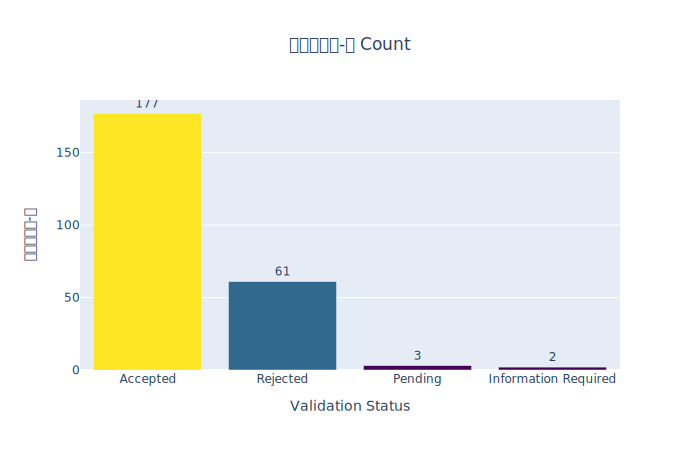

In [21]:
df_ward=df[df["Ward"]=="वार्ड-इ"]
df_ward_model=df_ward["Validation Status"].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
fig = go.Figure(go.Bar(
    x=df_ward_model['Validation Status'],y=df_ward_model['Count'],
    marker={'color': df_ward_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ward_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='वार्ड-इ Count',xaxis_title="Validation Status ",yaxis_title="वार्ड-इ ",title_x=0.5)
fig.show("svg")

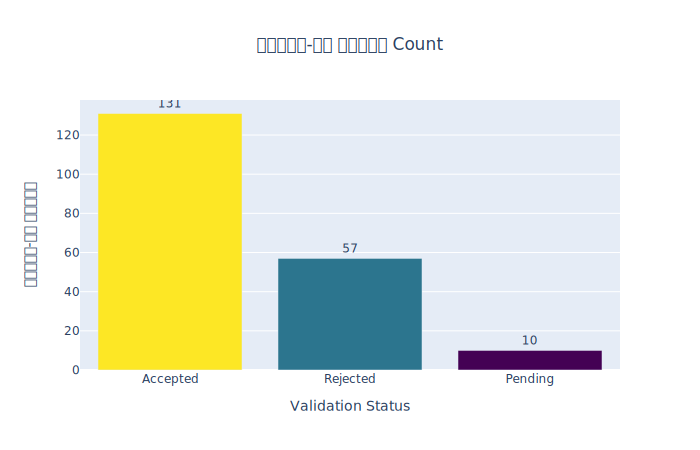

In [22]:
df_ward=df[df["Ward"]=="वार्ड-एफ उत्तर"]
df_ward_model=df_ward["Validation Status"].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
fig = go.Figure(go.Bar(
    x=df_ward_model['Validation Status'],y=df_ward_model['Count'],
    marker={'color': df_ward_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ward_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='वार्ड-एफ उत्तर Count',xaxis_title="Validation Status ",yaxis_title="वार्ड-एफ उत्तर ",title_x=0.5)
fig.show("svg")

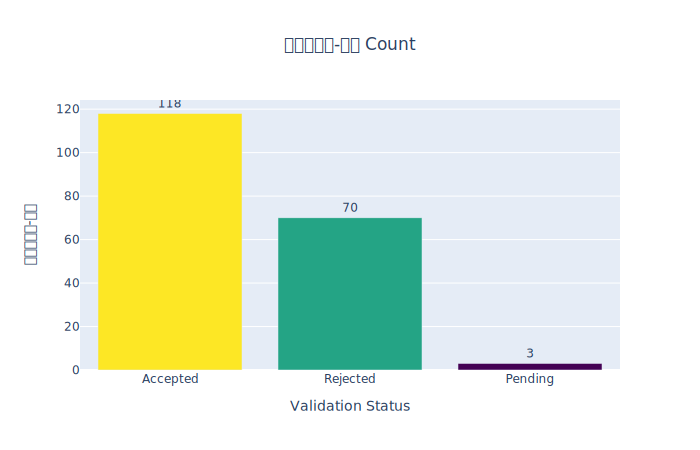

In [23]:
df_ward=df[df["Ward"]=="वार्ड-डी"]
df_ward_model=df_ward["Validation Status"].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
fig = go.Figure(go.Bar(
    x=df_ward_model['Validation Status'],y=df_ward_model['Count'],
    marker={'color': df_ward_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ward_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='वार्ड-डी Count',xaxis_title="Validation Status ",yaxis_title="वार्ड-डी ",title_x=0.5)
fig.show("svg")

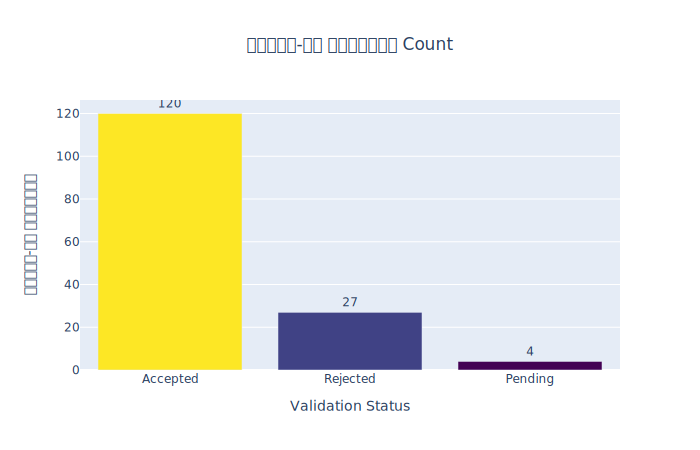

In [24]:
df_ward=df[df["Ward"]=="वार्ड-एफ दक्षिंण"]
df_ward_model=df_ward["Validation Status"].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
fig = go.Figure(go.Bar(
    x=df_ward_model['Validation Status'],y=df_ward_model['Count'],
    marker={'color': df_ward_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ward_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='वार्ड-एफ दक्षिंण Count',xaxis_title="Validation Status ",yaxis_title="वार्ड-एफ दक्षिंण ",title_x=0.5)
fig.show("svg")

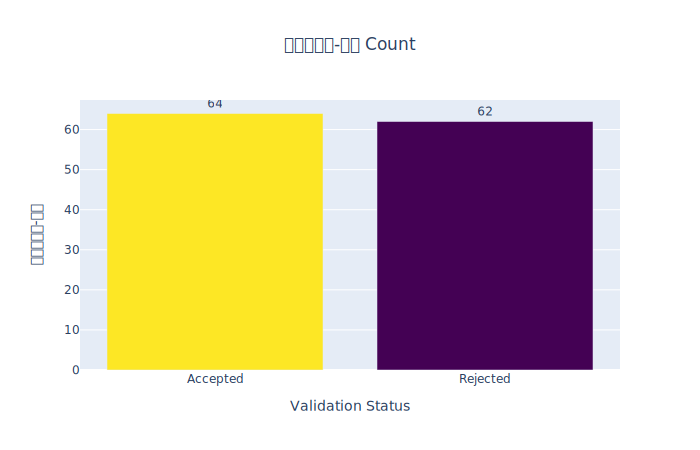

In [25]:
df_ward=df[df["Ward"]=="वार्ड-सी"]
df_ward_model=df_ward["Validation Status"].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
fig = go.Figure(go.Bar(
    x=df_ward_model['Validation Status'],y=df_ward_model['Count'],
    marker={'color': df_ward_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ward_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='वार्ड-सी Count',xaxis_title="Validation Status ",yaxis_title="वार्ड-सी ",title_x=0.5)
fig.show("svg")

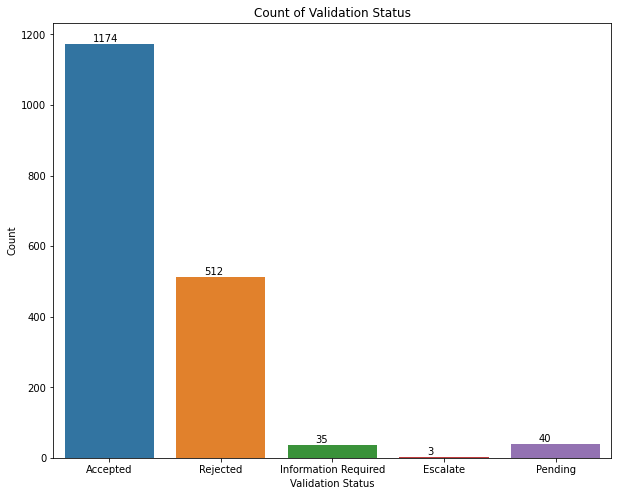

In [26]:
plt.figure(figsize = (10, 8))
plt.title('Count of Validation Status')
ax=sns.countplot(x = 'Validation Status', data = df)
plt.xlabel('Validation Status')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

The above bar plot shows the count of validation status

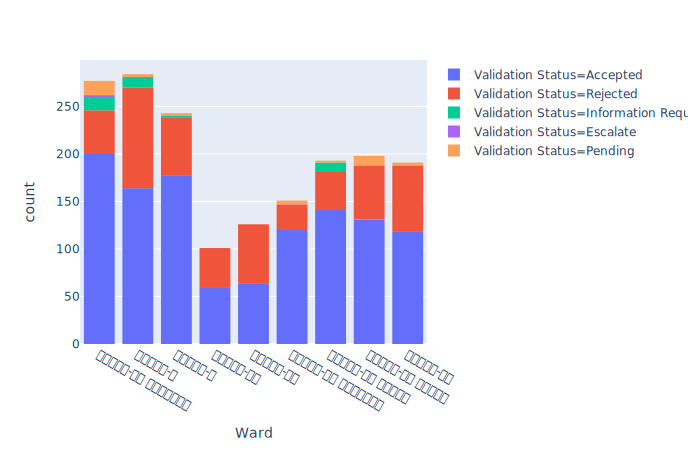

In [27]:
fig=px.histogram(df, x="Ward", color="Validation Status")
fig.show("svg")

From the above plots we can clearly arrange the wards in a descending order based upon the number of approvals obtained in each ward

The descending order is:

वार्ड-जी दक्षिंण

वार्ड-इ

वार्ड-ए

वार्ड-जी उत्तर

वार्ड-एफ उत्तर

वार्ड-एफ दक्षिंण

वार्ड-डी

वार्ड-सी

वार्ड-बी



In [28]:
df['Ward'].unique()

array(['वार्ड-जी दक्षिंण', 'वार्ड-ए', 'वार्ड-बी', 'वार्ड-जी उत्तर',
       'वार्ड-इ', 'वार्ड-एफ उत्तर', 'वार्ड-डी', 'वार्ड-सी',
       'वार्ड-एफ दक्षिंण'], dtype=object)

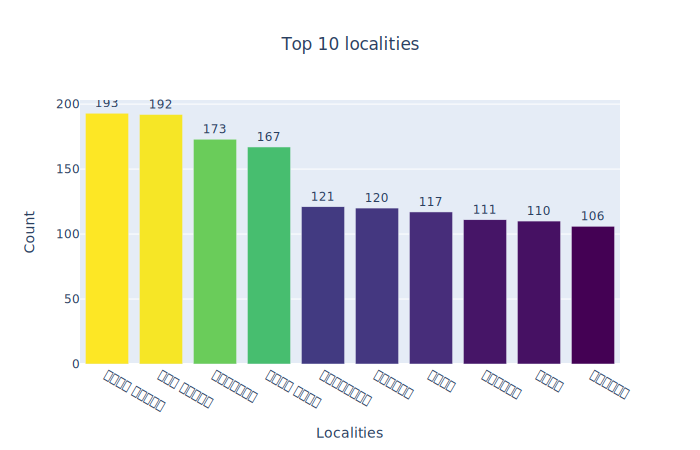

In [29]:
df_Make=df['Localities'].value_counts().reset_index().rename(columns={'index':'Localities','Localities':'Count'})[0:10]
df_Make
fig = go.Figure(go.Bar(
    x=df_Make['Localities'],y=df_Make['Count'],
    marker={'color': df_Make['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Make['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 localities',xaxis_title="Localities ",yaxis_title="Count  ",title_x=0.5)
fig.show("svg")

From the above plot we can clearly see the top 10 Localities

The top 10 localities are:

1. दादर वेस्ट
2. सात रस्ता
3. चर्चगेट
4. लोअर परेल
5. भुलेश्वर
6. गिरगाव
7. परेल
8. कुलाबा
9. वरळी
10. माजगाव

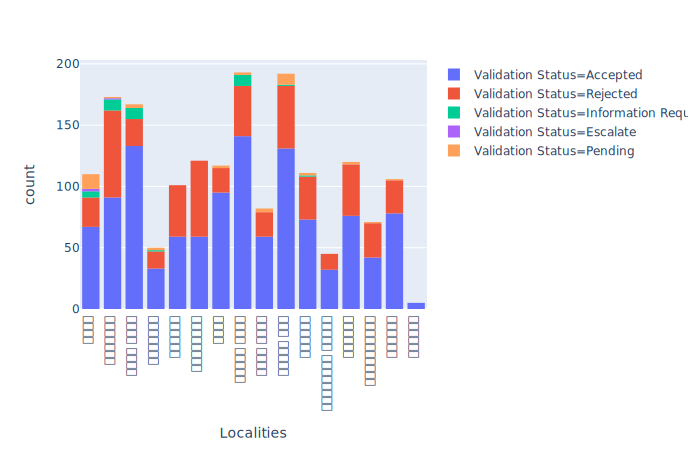

In [30]:
fig=px.histogram(df, x="Localities", color="Validation Status")
fig.show("svg")

The above plot shows the validation status in each of the localities present in the dataset.

This plot also tells us about the validation status of the top 10 localities

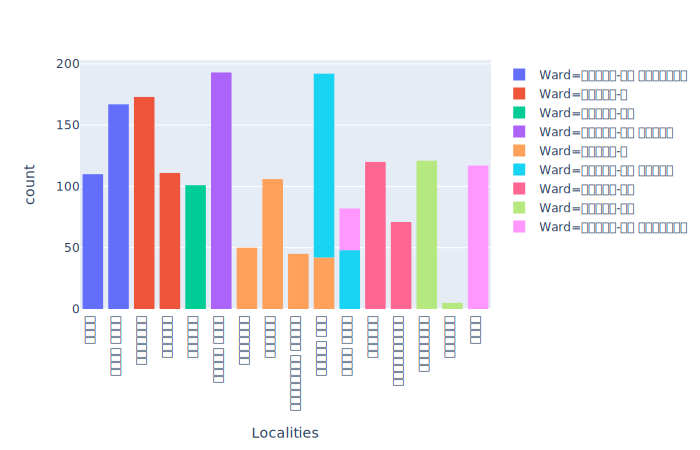

In [31]:
fig=px.histogram(df, x="Localities", color="Ward")
fig.show("svg")

The above plot shows the localities and their respective wards associated with each locality.

From this plot we can also figure out the wards associated with the top 10 localities

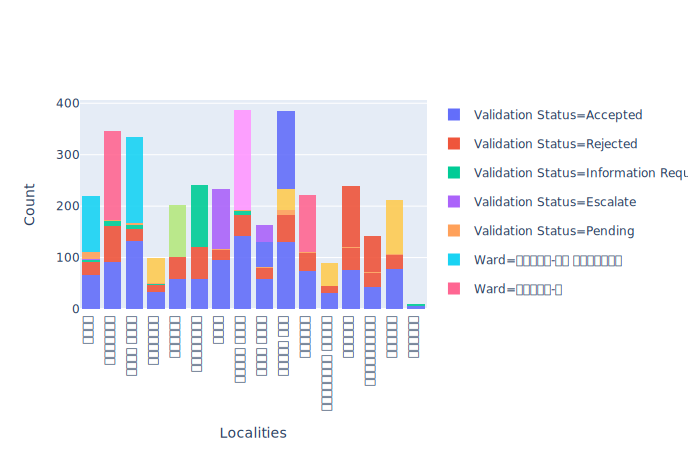

In [32]:
figure_data=[]
figure_data.extend([i for i in px.histogram(df, x="Localities", color="Validation Status", histfunc="count").to_dict()['data']])
figure_data.extend([i for i in px.histogram(df, x="Localities", color="Ward", histfunc="count").to_dict()['data']])
fig=go.Figure(figure_data)
fig.update_layout(barmode='stack')
fig.update_traces(overwrite=True, marker={"opacity": 0.9}) 
fig.update_layout(xaxis_title="Localities ",yaxis_title="Count  ",title_x=0.5)
fig.show("svg")

The above plot shows the localities, their respective wards and also the validation status of each locality.

Through this plot we can figure out the wards and validation status of the top 10 localities

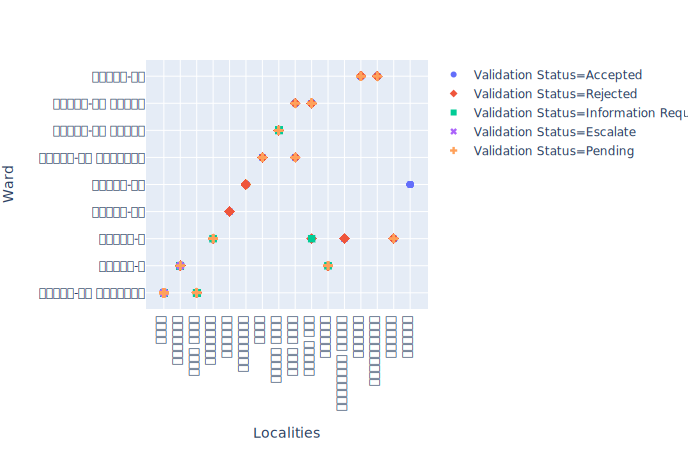

In [33]:
fig = px.scatter(df, x="Localities", y="Ward", color="Validation Status",symbol="Validation Status")
fig.show("svg")

The above scatter plot shows the localities on the X-axis and wards on the Y-axis and then it maps the validation status of each corresponding ward and locality

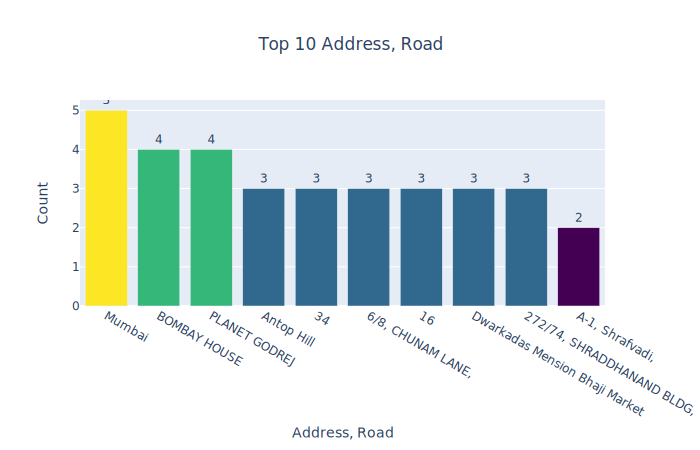

In [34]:
df_road=df['Address, Road'].value_counts().reset_index().rename(columns={'index':'Address, Road','Address, Road':'Count'})[0:10]
df_road
fig = go.Figure(go.Bar(
    x=df_road['Address, Road'],y=df_road['Count'],
    marker={'color': df_road['Count'], 
    'colorscale': 'Viridis'},  
    text=df_road['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Address, Road',xaxis_title="Address, Road ",yaxis_title="Count  ",title_x=0.5)
fig.show("svg")

From the above plot we can clearly see the top 10 Address, Road

The top 10 Address,Road are:

1. Mumbai
2. BOMBAY HOUSE
3. PLANET GODREJ
4. Antop Hill
5. 34
6. 6/8, CHUNAM LANE
7. 16
8. Dwarkadas Mension Bhaji Market
9. 272/74, SHRADDHANAND BLDG
10. A-1, Shrafvadi

In [35]:
df.columns

Index(['Serial Number', 'Society Name', 'Type of institution',
       'Registration Number', 'Registration Date', 'Address, Road',
       'Street, Near', 'Opposite', 'District', 'Ward', 'Localities',
       'Audit Grade', 'Paid Up Share Capital', 'Validation Status'],
      dtype='object')

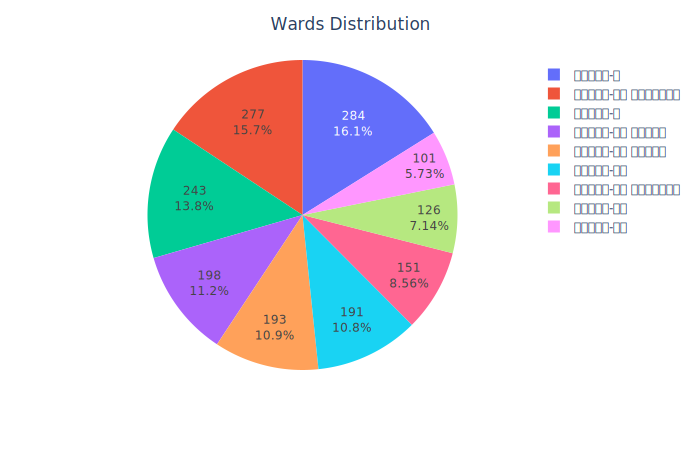

In [36]:
df_Wards=df['Ward'].value_counts().reset_index().rename(columns={'index':'Ward','Ward':'Count'})
df_Wards
fig = px.pie(df_Wards, values='Count', names='Ward')

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)
fig.update_layout(title="Wards Distribution",title_x=0.5)
fig.show("svg")

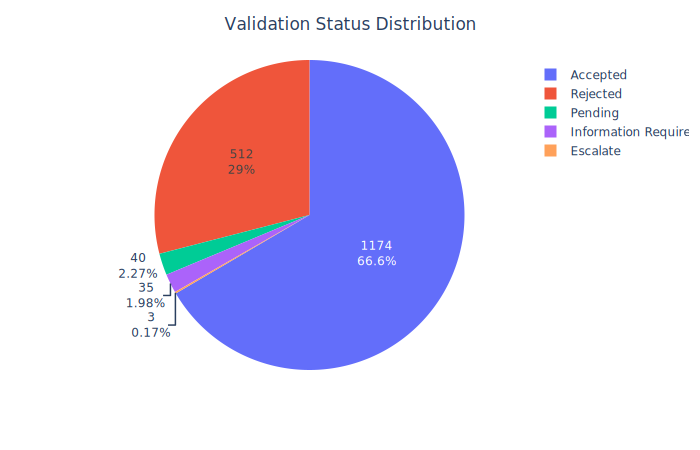

In [37]:
df_validation=df['Validation Status'].value_counts().reset_index().rename(columns={'index':'Validation Status','Validation Status':'Count'})
df_validation
fig = px.pie(df_validation, values='Count', names='Validation Status')

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)
fig.update_layout(title="Validation Status Distribution",title_x=0.5)
fig.show("svg")

In [38]:
df.head()

,Serial Number,Society Name,Type of institution,Registration Number,Registration Date,"Address, Road","Street, Near",Opposite,District,Ward,Localities,Audit Grade,Paid Up Share Capital,Validation Status
1,2,SUKHADA SAHAKARI GRUHANIRAMAN SANSTHA LTD,महाराष्ट्र राज्य सहकारी बँक,B.O.M./W.G.S./H.S.G/T.C/6666,25/01/1996,SUKHADA,SIR POCHKHANWALA ROAD,OPP. WORLI R.T.O.,Mumbai 1,वार्ड-जी दक्षिंण,वरळी,B,21500.0,Accepted
3,4,THE NAVAL DOCKYARD CO-OPERATIVE BANK LIMITED,महाराष्ट्र राज्य सहकारी बँक,6969,24/02/1931,NAVAL DOCKYARD,SHAHID BHAGAT SINGH MARG,LION GATE,Mumbai 1,वार्ड-ए,चर्चगेट,1,1069.0,Accepted
4,5,NIRMAN KENDRA PREMISES CO-OPERATIVE SOCIETY LI...,महाराष्ट्र राज्य सहकारी बँक,BOM/W/G-S/GNL/(C)/463/97-98/97,07/11/1997,PLOT NO.3,"Dr. E. MOSES ROAD, C.S. NO. 4/69(Part)","Near Famous Studios, Mahalaxmi Estate",Mumbai 1,वार्ड-जी दक्षिंण,लोअर परेल,2,45800.0,Accepted
7,8,Maha Test User 2,महाराष्ट्र राज्य सहकारी बँक,AKAPG4564F2,01/12/2013,Mumbai,Mumbai,Mumbai,Mumbai 1,वार्ड-बी,मस्जिद,A,20.0,Rejected
8,9,test,महाराष्ट्र राज्य सहकारी बँक,453453456546,27/01/2009,test,test,test,Mumbai 1,वार्ड-जी उत्तर,दादर वेस्ट,A,5546546.0,Rejected


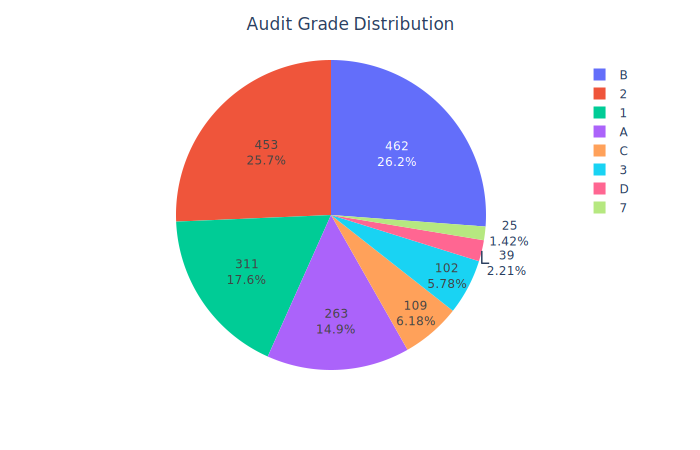

In [39]:
df_audit=df['Audit Grade'].value_counts().reset_index().rename(columns={'index':'Audit Grade','Audit Grade':'Count'})
df_audit
fig = px.pie(df_audit, values='Count', names='Audit Grade')

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)
fig.update_layout(title="Audit Grade Distribution",title_x=0.5)
fig.show("svg")

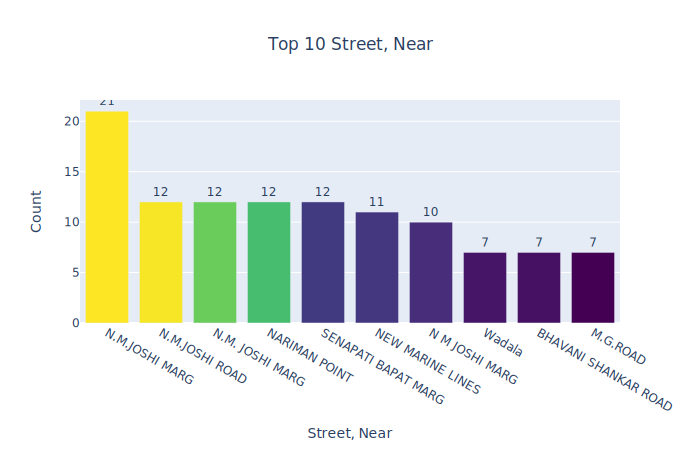

In [40]:
df_street=df['Street, Near'].value_counts().reset_index().rename(columns={'index':'Street, Near','Street, Near':'Count'})[0:10]
df_street
fig = go.Figure(go.Bar(
    x=df_street['Street, Near'],y=df_street['Count'],
    marker={'color': df_Make['Count'], 
    'colorscale': 'Viridis'},  
    text=df_street['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Street, Near',xaxis_title="Street, Near ",yaxis_title="Count  ",title_x=0.5)
fig.show("svg")

In the above bar plot we can see the top 10 Street, Near but we can also see that 'N.M. JOSHI MARG', 'N.M.JOSHI ROAD', 'N M JOSHI MARG','N.M.Joshi Marg', 'N.M.JOSHI MARG' are all same but are beign considered different due to the slight change in their writing style.

In [41]:
df['Street, Near'].nunique()

1379

In [42]:
# In this step we will replace the repeating values in the 'Street, Near'
df.replace(to_replace=['N.M. JOSHI MARG', 'N.M.JOSHI ROAD', 'N M JOSHI MARG','N.M.Joshi Marg'],
           value= ['N.M.JOSHI MARG', 'N.M.JOSHI MARG', 'N.M.JOSHI MARG','N.M.JOSHI MARG'], 
           inplace=True)

In [43]:
df['Street, Near'].nunique()

1375

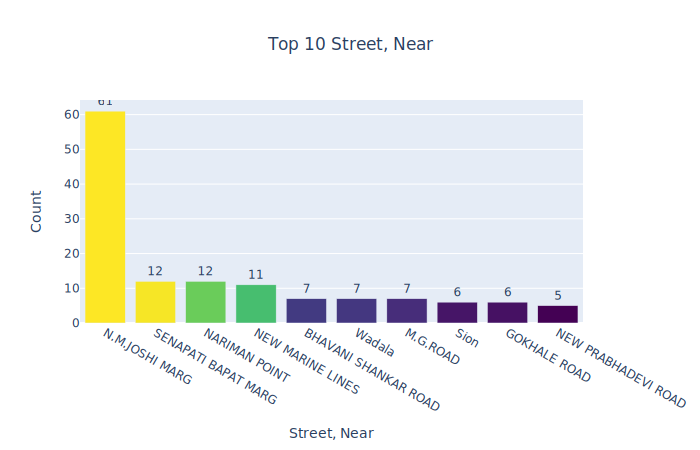

In [44]:
df_street=df['Street, Near'].value_counts().reset_index().rename(columns={'index':'Street, Near','Street, Near':'Count'})[0:10]
df_street
fig = go.Figure(go.Bar(
    x=df_street['Street, Near'],y=df_street['Count'],
    marker={'color': df_Make['Count'], 
    'colorscale': 'Viridis'},  
    text=df_street['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Street, Near',xaxis_title="Street, Near ",yaxis_title="Count  ",title_x=0.5)
fig.show("svg")

Now, we can see the top 10 distinct Street, Near

The top 10 Street, Near are:
1. N.M.JOSHI MARG
2. SENAPATI BAPAT MARG
3. NARIMAN POINT
4. NEW MARINE LINES
5. BHAVANI SHANKAR ROAD
6. Wadala
7. M.G.ROAD
8. Sion
9. GOKHALE ROAD
10. NEW PRABHADEVI ROAD

In [45]:
df['Type of institution'].unique()

array(['महाराष्ट्र राज्य सहकारी बँक', 'जिल्हा मध्यवर्ती सहकारी बँक',
       'नागरी सहकारी बँका (रु. 25/- कोटी पेक्षा जास्त ठेवी असणाऱ्या )',
       'महाराष्ट्र राज्य सहकारी साखर कारखाना',
       'महाराष्ट्र राज्य सहकारी पतसंस्थांचा फेडरेशन',
       'महाराष्ट्र राज्य औद्योगिक सहकारी संस्थांचे फेडरेशन',
       'महाराष्ट्र राज्य नागरी बँक असोसिएशन',
       'महाराष्ट्र राज्य सहकारी हातमाग महासंघ',
       'महाराष्ट्र राज्य सहकारी टेक्सटाईल महासंघ',
       'महाराष्ट्र राज्य सहकारी कापूस उत्पादक महासंघ',
       'महाराष्ट्र राज्य सहकारी ग्राहक महासंघ',
       'महाराष्ट्र राज्य सहकारी मत्स्य व्यवसाय संघ',
       'महाराष्ट्र राज्य सहकारी संघ व तिचे विभागीय बोर्ड',
       'महाराष्ट्र राज्य सहकारी दुध संघ(महानंदा)',
       'महाराष्ट्र राज्य सहकारी गृहनिर्माण वित्त महामंडळ',
       'पगारदार नोकरांची सहकारी बँका (रु. 25/- कोटी पेक्षा जास्त ठेवी असणाऱ्या  )',
       'महाराष्ट्र राज्य सहकारी पणन महासंघ',
       'निबंधक वेळोवेळी वर्गीकृत करतील अशा संस्था वर्ग अ',
       'जिल्हा सहकारी दुध संघ',
       

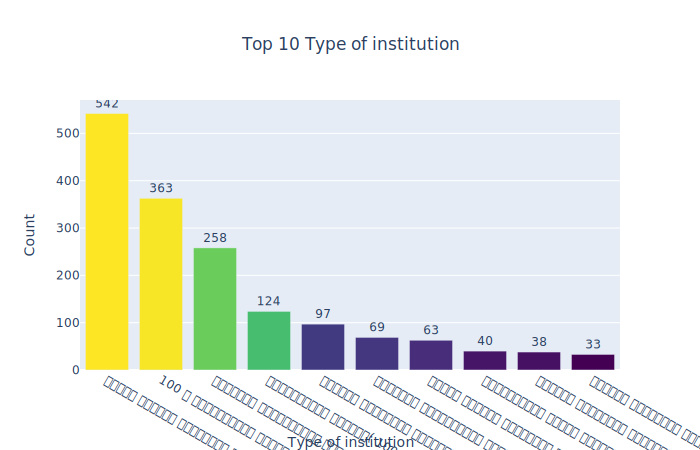

In [46]:
df_insti=df['Type of institution'].value_counts().reset_index().rename(columns={'index':'Type of institution','Type of institution':'Count'})[0:10]
df_insti
fig = go.Figure(go.Bar(
    x=df_insti['Type of institution'],y=df_insti['Count'],
    marker={'color': df_Make['Count'], 
    'colorscale': 'Viridis'},  
    text=df_insti['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Type of institution',xaxis_title="Type of institution ",yaxis_title="Count  ",title_x=0.5)
fig.show("svg")

From the above plot we can figure out the top 10 types of institution

The top 10 institution types are:
1. नागरी सहकारी पतसंस्था व ग्रामीण बिगर कृषी पतसंस्था(रु. 10/- कोटी पेक्षा कमी ठेवी असणाऱ्या)
2. 100 व त्यापेक्षा जास्त सभासद असणाऱ्या गृहनिर्माण संस्था
3. पगारदार नोकरांच्या संस्था(रु. 10/- कोटी पेक्षा कमी खेळते भांडवल असणाऱ्या)
4. गृहनिर्माण संस्था( 100 पेक्षा कमी सभासद असणाऱ्या )
5. निबंधक वेळोवेळी वर्गीकृत करतील अशा संस्था वर्ग अ
6. पगारदार नोकरांच्या सहकारी पतसंस्था(रु. 10/- कोटी व त्यापेक्षा जास्त खेळते भांडवल असणाऱ्या)
7. नागरी सहकारी पतसंस्था आणि ग्रामीण बिगर कृषी पतसंस्था (रु. 10/- कोटी व त्यापेक्षा जास्त ठेवी असणाऱ्या )
8. महाराष्ट्र राज्य सहकारी बँक
9. निबंधक वेळोवेळी वर्गीकृत करतील अशा संस्था वर्ग ब
10. सहकारी औद्योगिक वसाहती



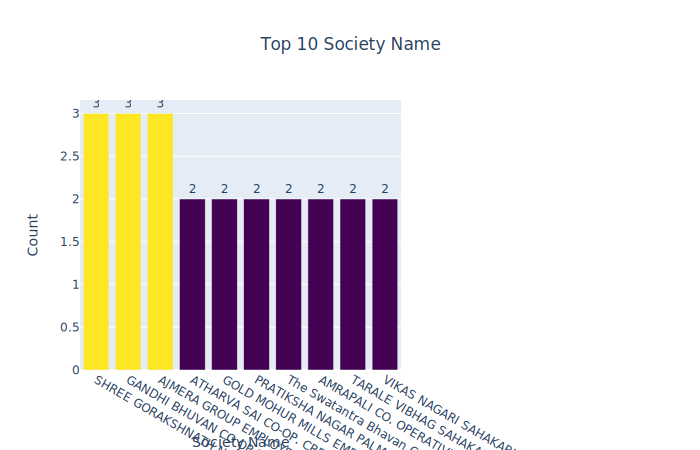

In [50]:
df_society=df['Society Name'].value_counts().reset_index().rename(columns={'index':'Society Name','Society Name':'Count'})[0:10]
df_society
fig = go.Figure(go.Bar(
    x=df_society['Society Name'],y=df_society['Count'],
    marker={'color': df_society['Count'], 
    'colorscale': 'Viridis'},  
    text=df_society['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Society Name',xaxis_title="Society Name ",yaxis_title="Count  ",title_x=0.5)
fig.show("svg")

The above plot shows the top 10 Society Names:

The top 10 societies are:
1. SHREE GORAKSHNATH NAGARI SAHAKARI PTASANSTHA MARYADIT, MUMBAI
2. GANDHI BHUVAN CO OP HSG SOC LTD
3. AJMERA GROUP EMPLOYEES CO OP CREDIT SOCIETY LTD. FORT MUMBAI
4. ATHARVA SAI CO-OP CREDIT SOCIETY LTD
5. GOLD MOHUR MILLS EMPLOYEES CO-OPERATIVE CRIDIT SOCIETY LTD
6. PRATIKSHA NAGAR PALM ACRES CO OP HSG SOC LTD
7. The Swatantra Bhavan Co-operative Housing Society Limited
8. AMRAPALI CO. OPERATIVE CREDIT SOCIETY LIMITED
9. TARALE VIBHAG SAHAKARI PTASANSTHA MARYADIT
10. VIKAS NAGARI SHANKARI PATSANSTHA MARYADIT, MUMBAI


## **CONCLUSION:**

**1.**The decreasing order of wards is based on the validation status:

वार्ड-जी दक्षिंण

वार्ड-इ

वार्ड-ए

वार्ड-जी उत्तर

वार्ड-एफ उत्तर

वार्ड-एफ दक्षिंण

वार्ड-डी

वार्ड-सी

वार्ड-बी

**2.**The top 10 localities are: 
1. दादर वेस्ट
2. सात रस्ता
3. चर्चगेट
4. लोअर परेल
5. भुलेश्वर
6. गिरगाव
7. परेल
8. कुलाबा
9. वरळी
10. माजगाव

**3.** The top 10 Address, Road are:
1. Mumbai
2. BOMBAY HOUSE
3. PLANET GODREJ
4. Antop Hill
5. 34
6. 6/8, CHUNAM LANE
7. 16
8. Dwarkadas Mension Bhaji Market
9. 272/74, SHRADDHANAND BLDG
10. A-1, Shrafvadi

**4.** The top 10 Street, Near are:
1. N.M.JOSHI MARG
2. SENAPATI BAPAT MARG
3. NARIMAN POINT
4. NEW MARINE LINES
5. BHAVANI SHANKAR ROAD
6. Wadala
7. M.G.ROAD
8. Sion
9. GOKHALE ROAD
10. NEW PRABHADEVI ROAD

**5.** The top 10 institution types are:
1. नागरी सहकारी पतसंस्था व ग्रामीण बिगर कृषी पतसंस्था(रु. 10/- कोटी पेक्षा कमी ठेवी असणाऱ्या)
2. 100 व त्यापेक्षा जास्त सभासद असणाऱ्या गृहनिर्माण संस्था
3. पगारदार नोकरांच्या संस्था(रु. 10/- कोटी पेक्षा कमी खेळते भांडवल असणाऱ्या)
4. गृहनिर्माण संस्था( 100 पेक्षा कमी सभासद असणाऱ्या )
5. निबंधक वेळोवेळी वर्गीकृत करतील अशा संस्था वर्ग अ
6. पगारदार नोकरांच्या सहकारी पतसंस्था(रु. 10/- कोटी व त्यापेक्षा जास्त खेळते भांडवल असणाऱ्या)
7. नागरी सहकारी पतसंस्था आणि ग्रामीण बिगर कृषी पतसंस्था (रु. 10/- कोटी व त्यापेक्षा जास्त ठेवी असणाऱ्या )
8. महाराष्ट्र राज्य सहकारी बँक
9. निबंधक वेळोवेळी वर्गीकृत करतील अशा संस्था वर्ग ब
10. सहकारी औद्योगिक वसाहती

**6.** The top 10 names of socities are:
1. SHREE GORAKSHNATH NAGARI SAHAKARI PTASANSTHA MARYADIT, MUMBAI
2. GANDHI BHUVAN CO OP HSG SOC LTD
3. AJMERA GROUP EMPLOYEES CO OP CREDIT SOCIETY LTD. FORT MUMBAI
4. ATHARVA SAI CO-OP CREDIT SOCIETY LTD
5. GOLD MOHUR MILLS EMPLOYEES CO-OPERATIVE CRIDIT SOCIETY LTD
6. PRATIKSHA NAGAR PALM ACRES CO OP HSG SOC LTD
7. The Swatantra Bhavan Co-operative Housing Society Limited
8. AMRAPALI CO. OPERATIVE CREDIT SOCIETY LIMITED
9. TARALE VIBHAG SAHAKARI PTASANSTHA MARYADIT
10. VIKAS NAGARI SHANKARI PATSANSTHA MARYADIT, MUMBAI

**7.** 66.6% of the validation status was accepted.

**8.** वार्ड-ए contributed 16.1% of the total ward distribution (i.e there were more number of वार्ड-ए wards when compared to other wards.

**9.** The top 10 localities and their respective wards:
1. दादर वेस्ट was mapped to वार्ड-जी उत्तर
2. सात रस्ता was mapped to वार्ड-एफ उत्तर and वार्ड-इ
3. चर्चगेट was mapped to वार्ड-ए
4. लोअर परेल was mapped to वार्ड-जी दक्षिंण
5. भुलेश्वर was mapped to वार्ड-सी
6. गिरगाव was mapped to वार्ड-डी
7. परेल was mapped to वार्ड-एफ दक्षिंण
8. कुलाबा was mapped to वार्ड-ए
9. वरळी was mapped to वार्ड-जी दक्षिंण
10. माजगाव was mapped to वार्ड-इ

